Hi both! 

I thought we'd have an initial look at some of the statistics associated with the SSH. This was inspired by the paper Thierry's postdoc is working on, but I thought we'd go after something a buit more accessible in terms of tackling a physically intuitive result. We will see if we succeed!

The idea comes from combining the AMOC paper, where there was a change in AMOC between members of the OCCIPUT ensemble. I'd become interested in using some simple statistical moments to assess how we can "cheaply" track these changes.   

Hughes (2009) was an inspiration here. I've worked with SSH before, and it seemed a good place to start. 

The work I am doing postulates that jets act as barriers to mixing. This is particularily the case when a barotropic structure is present, like in the Southern Ocean. The Pacific sector is particularily good, which is why I thought I'd start out looking at this.

I hope to conceptually demonstrate that the jets can be identified, and how they are different between members. This is already (below) pretty cool! With the transects where there is more data I'm thinking we can do something fun to illustrate why this is significant. Maybe with some inverse modeling. 


<img src="Occiput_sections 2.png">


##Jets and "mixing barriers"?

The idea goes that is non-Gaussian behaviour (in time here) is present. Usually we use the first and second moments (mean and StD) to describe variability. I'm leaning on the idea that the using the third and fourth moments (skew and kurtosis) can give us important information.

Crash course: A Gaussian distribution has a kurtosis of 3, a sharply peaked distribution will be $>3$, while a more rounded one $<3$. Skewness describes gow the distribution slants. It's relatable to currents because if an area predominantly gets eddies from north of a jet, these will have a particular signature in etan in terms of depressing sea level.

Thompson and Demirov (2006) and Hughes (2009) pointed out that strong jets would be represented by a zero contour in skewness, and coincide with a low value of kurtosis. Skewness tends to be positive polewards of a strong eastwards current and vice versa (meandering eddies was the rationale). The "mixing barriers" thing comes into play when relative vorticity gets thrown in the mix.

<img src="Understanding-Tolerance-Analysis2.png">

### A physical example. 



The SSH profile of a WBC jet is well known; Thermal wind can describe how the slant in SSH towards the continent sets up a jet e.g. the Gulf Stream. The Jet rides the gradient, and the location of the jet can be seen from space in SSH images. 

In terms of the moments, we find a stable jet/front will have low kurtosis, in combination with zero skew. This is because the front/jet has limited transport across it (little skew), and effectively acts as a barrier to the SSH signals. 




### A Southern Ocean example

Taking an example from the Drake passage region (SSH to left), we see that where the kurtosis is low, there tends to be a pattern of a $-<zero>+$ region. A region where there is zero skew sandwitched by negative and positive regions.



<img src="skewLowKurtosisSketch.png">


In [324]:
from __future__ import print_function
import numpy as np
from numpy import cos, sin, pi
from scipy import stats, sparse
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from scipy.signal import detrend as det
%matplotlib inline
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
import h5py

Loading the data, the benefir of using something slightly more sophisticated would make it much cleaner ;)

In [39]:
SSH = np.zeros((36,5,12,373,721))

for year in np.arange(1980,2016):
    for month in np.arange(1,13):
        for run in np.arange(1,6):
            f = h5py.File('/home/maike/Documents/OCCIPUT/SOUTHPACIF025.L75/SOUTHPACIF025.L75-OCCITENS-S/1m/'+str(year)+'/SOUTHPACIF025.L75-OCCITENS.00'+str(run)+'_y'+str(year)+'m{:02d}.1m_gridT.nc'.format(month), 'r')
            SSH[year-1980, run-1, month-1, ...] = f['sossheig'][0,:,:]


In [202]:
SSH_runsStacked = np.zeros((36*5*12,373,721))
Iter=0
for year in np.arange(1980,2016):
    for month in np.arange(1,13):
        for run in np.arange(1,6):
            f = h5py.File('/home/maike/Documents/OCCIPUT/SOUTHPACIF025.L75/SOUTHPACIF025.L75-OCCITENS-S/1m/'+str(year)+'/SOUTHPACIF025.L75-OCCITENS.00'+str(run)+'_y'+str(year)+'m{:02d}.1m_gridT.nc'.format(month), 'r')
            SSH_runsStacked[Iter, ...] = f['sossheig'][0,:,:]
            Iter=Iter+1

In [48]:
landIndex = np.where(SSH[0,0,0,...]==0)
land = np.ones(SSH[0,0,0,...].shape)
land[landIndex]=np.nan

# SSH Run 1

Let's look at the first member as a sanity check. 

/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: All-NaN axis encountered
  # Remove the CWD from sys.path while we load stuff.
/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: All-NaN slice encountered
  app.launch_new_instance()


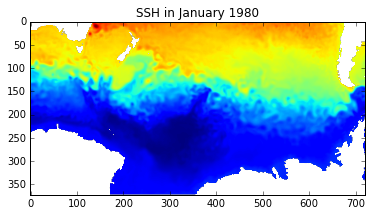

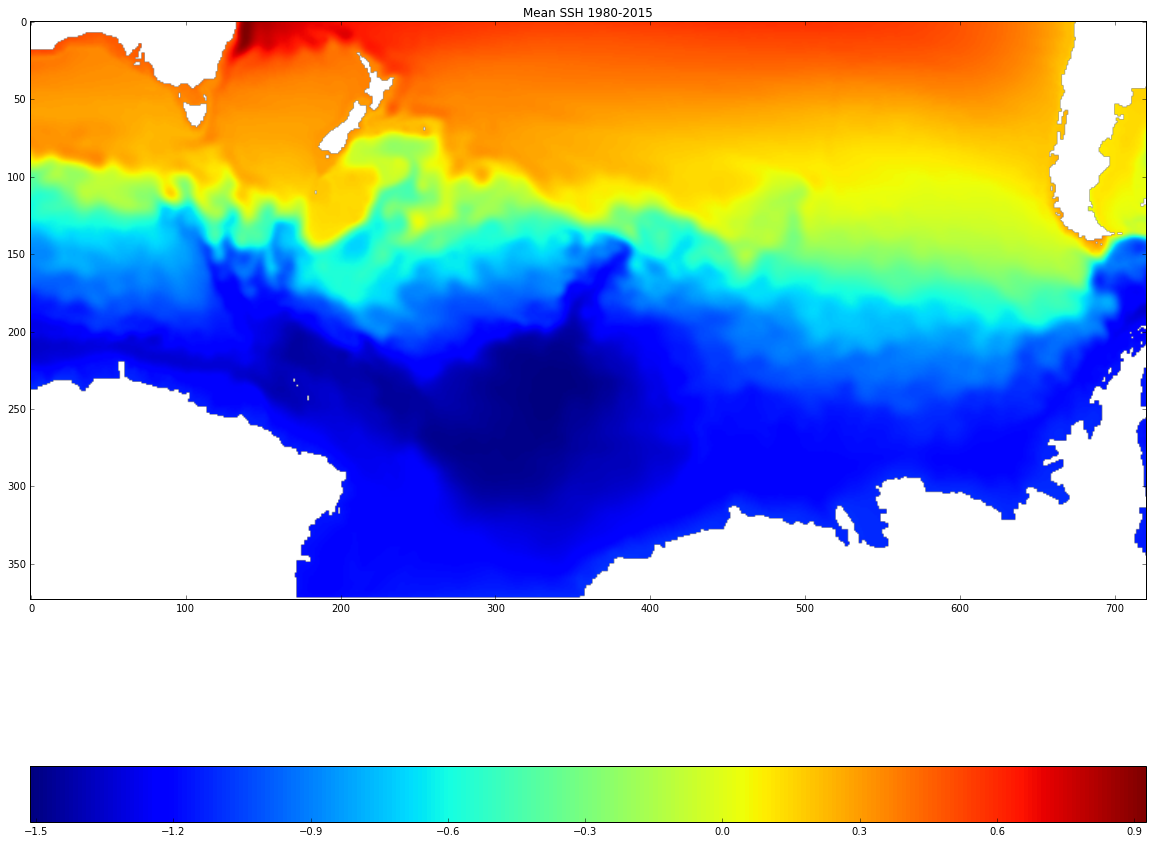

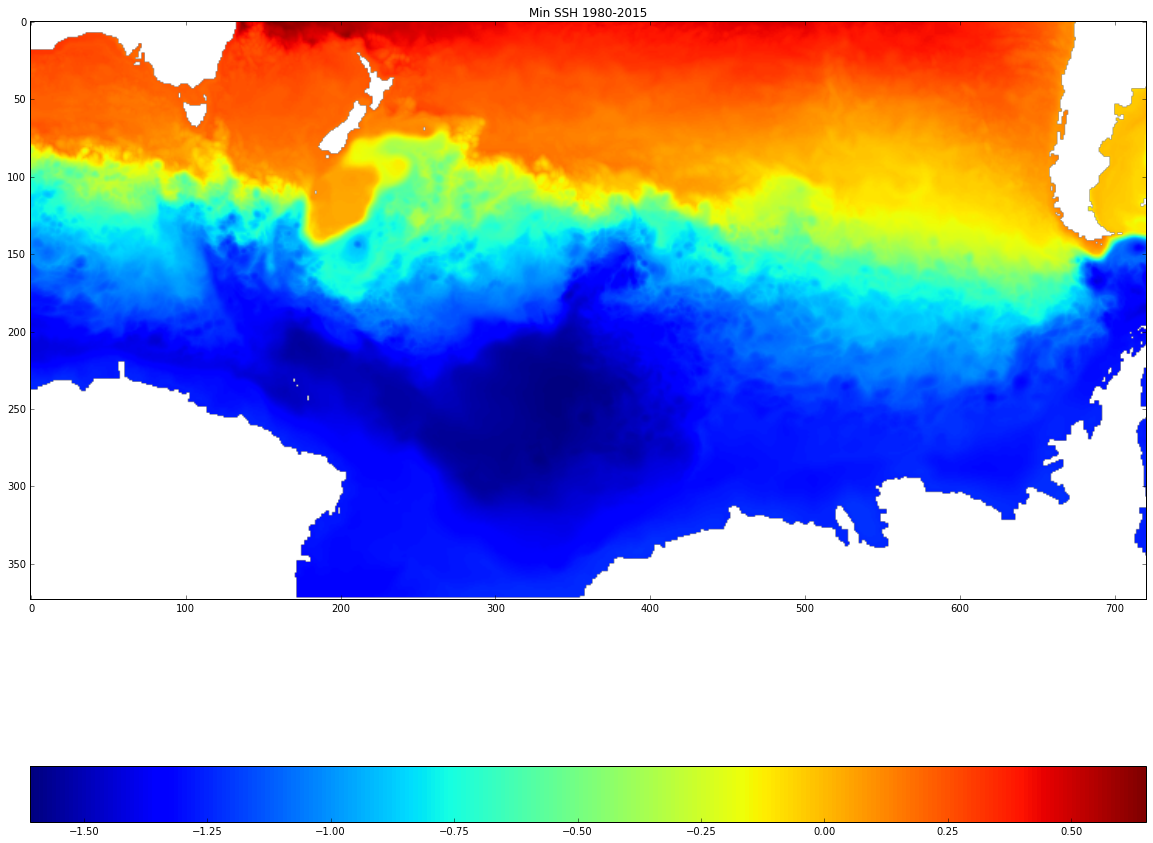

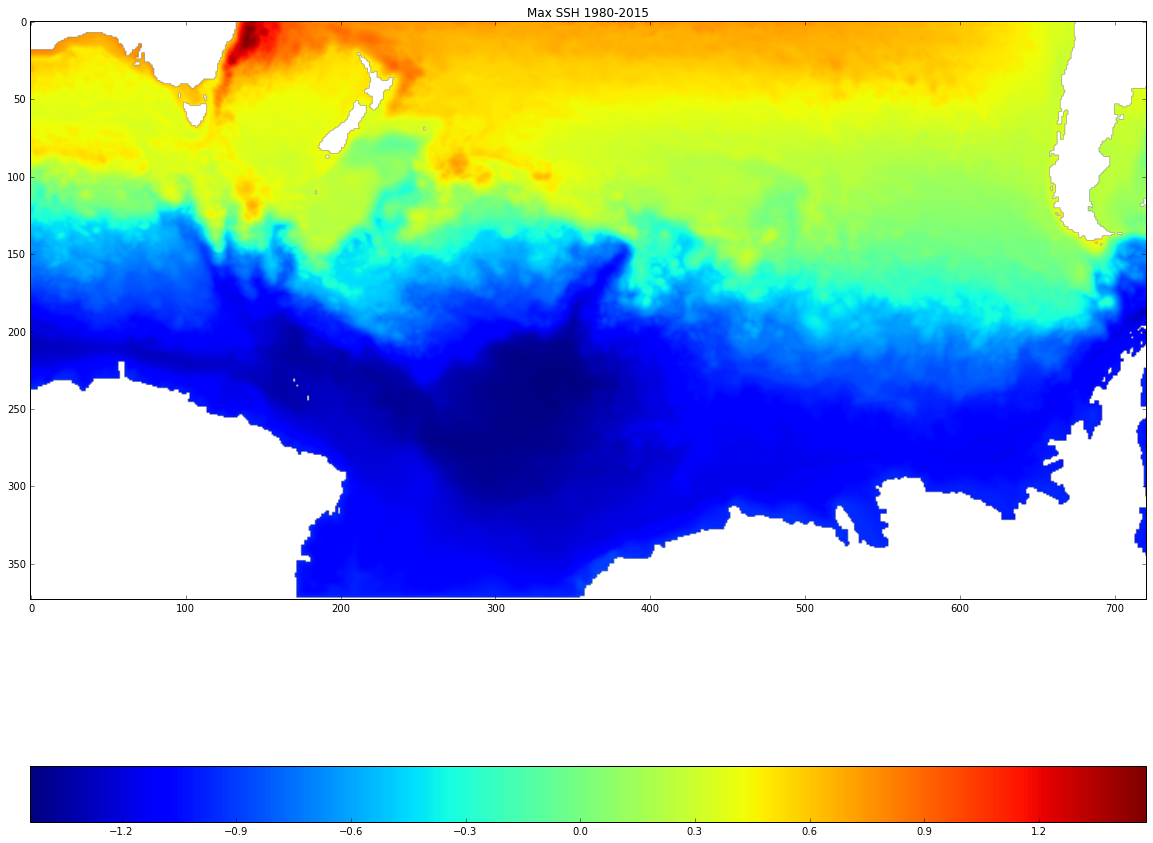

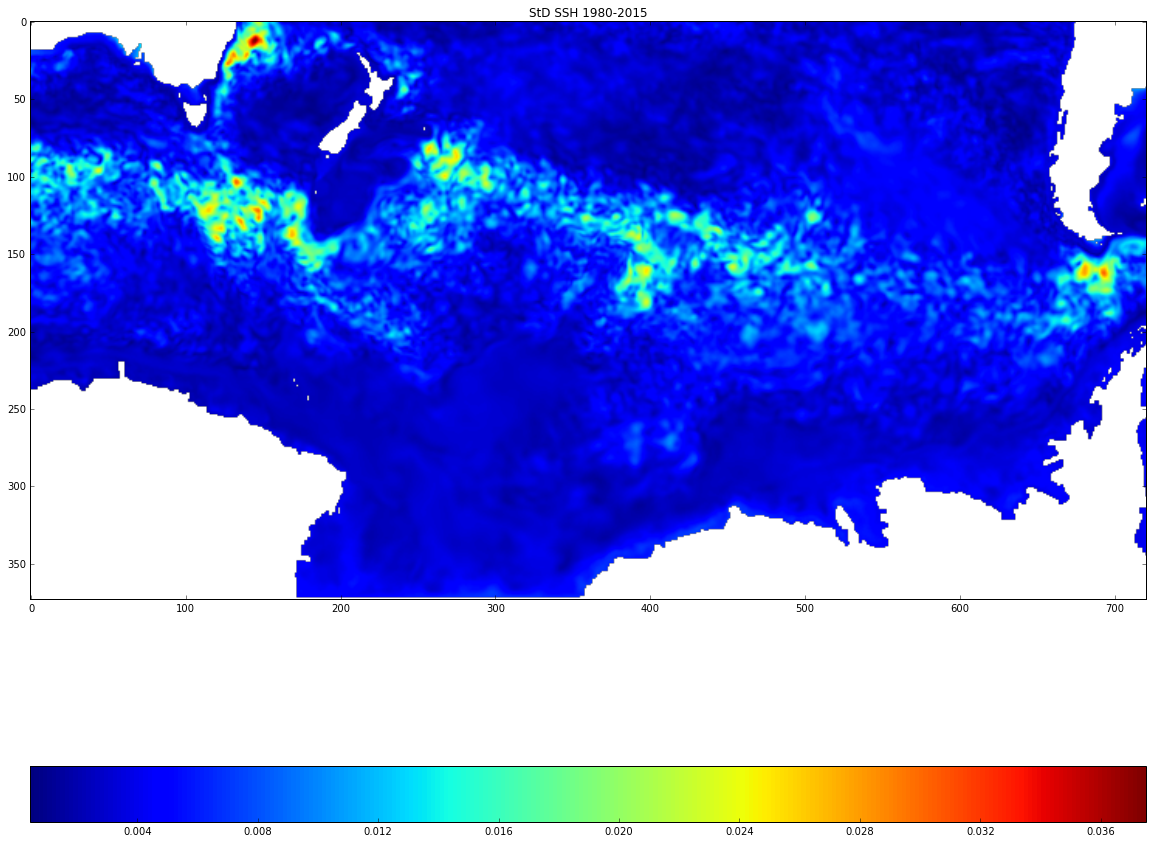

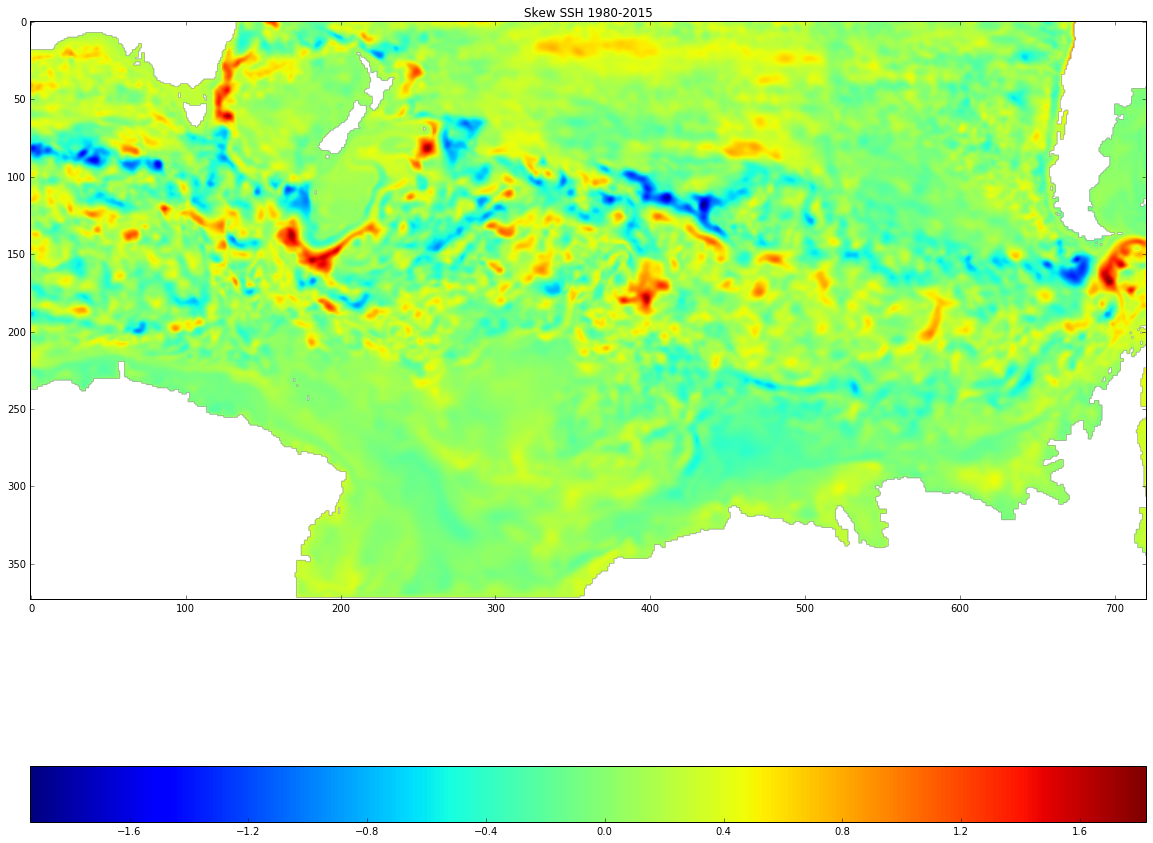

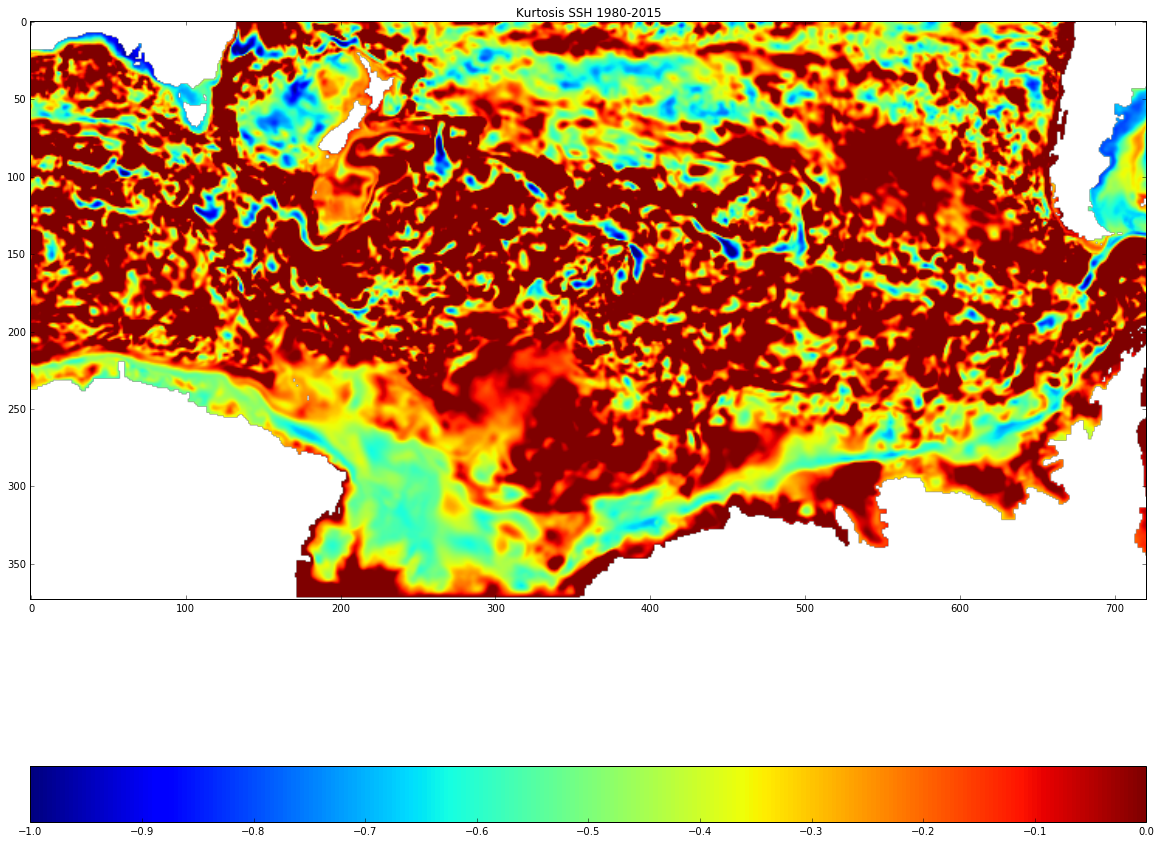

In [338]:
plt.imshow(np.fliplr(np.rot90(SSH[0,0,0,...]*land, 2)))
plt.title('SSH in January 1980')

plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(np.nanmean(np.nanmean(SSH[:,0,...]*land, axis=0), axis=0),2)))
plt.colorbar(orientation='horizontal')
plt.title('Mean SSH 1980-2015')

plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(np.nanmin(np.nanmin(SSH[:,0,...]*land, axis=0), axis=0),2)))
plt.colorbar(orientation='horizontal')
plt.title('Min SSH 1980-2015')


plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(np.nanmax(np.nanmax(SSH[:,0,...]*land, axis=0), axis=0),2)))
plt.colorbar(orientation='horizontal')
plt.title('Max SSH 1980-2015')


plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(np.nanstd(np.nanstd(SSH[:,0,...]*land, axis=0), axis=0),2)))
plt.colorbar(orientation='horizontal')
plt.title('StD SSH 1980-2015')

skewSSH_run0 = stats.skew(np.reshape(SSH[:,0,...], [36*12, 373,721])*land, axis=0)
kurtosisSSH_run0 = stats.kurtosis(np.reshape(SSH[:,0,...], [36*12, 373,721])*land, axis=0)

plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(skewSSH_run0,2)))
plt.colorbar(orientation='horizontal')
plt.title('Skew SSH 1980-2015')

plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(kurtosisSSH_run0,2)))
plt.colorbar(orientation='horizontal')
plt.title('Kurtosis SSH 1980-2015')
plt.clim(-1, 0)

So we definitely have some areas where the kurtosis is low in bands. Let's highlight this:

In [261]:
dataStD=np.ones(land.shape)
lowKurtosis_index = np.where(kurtosisSSH_run0<=-0.3)

/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


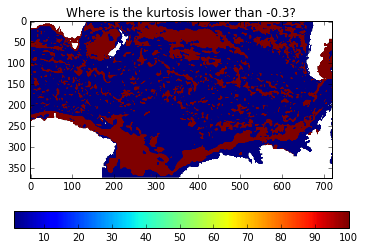

In [262]:
dataStD[lowKurtosis_index] = 100
plt.imshow(np.fliplr(np.rot90(dataStD*land,2)))
plt.colorbar(orientation='horizontal')
plt.title('Where is the kurtosis lower than -0.3?')

I wonder what the skew is doing there?

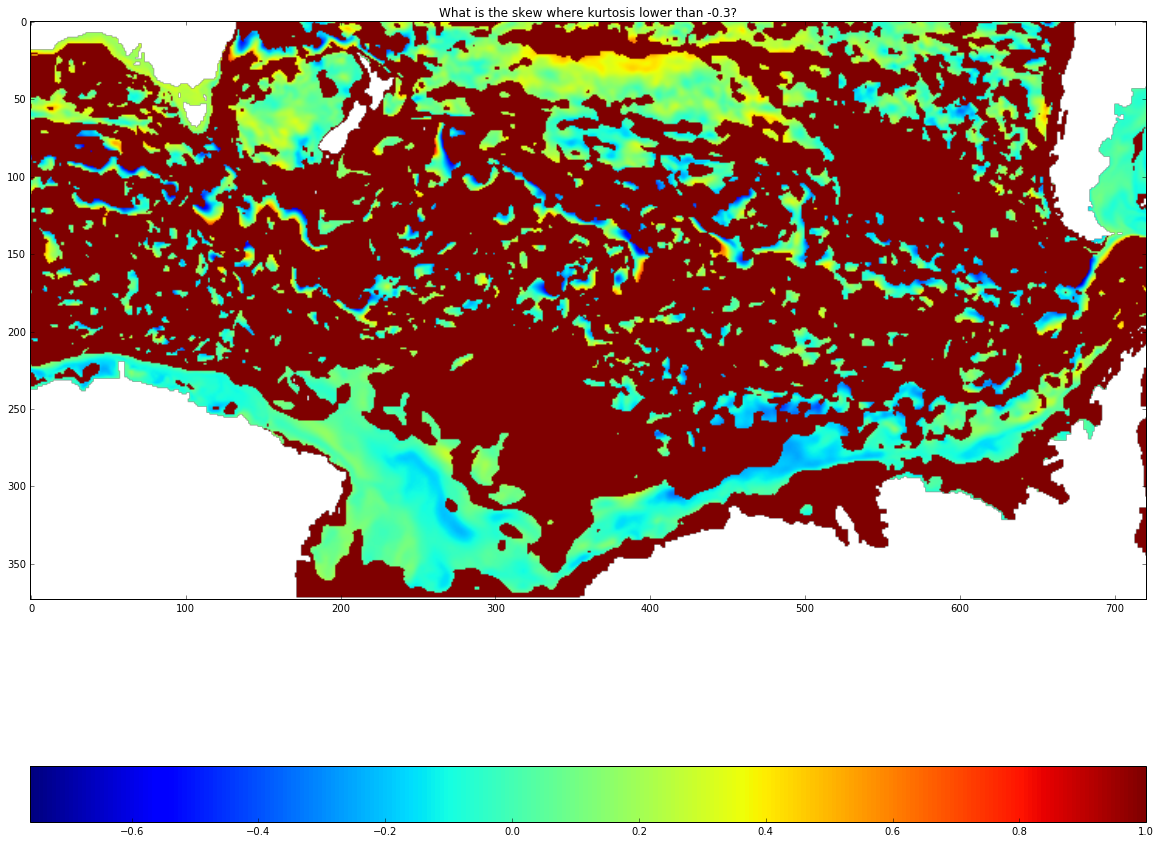

In [321]:
plt.figure(figsize=(20,20))
data=np.ones(land.shape)

data[lowKurtosis_index] = skewSSH_run0[lowKurtosis_index]
plt.imshow(np.fliplr(np.rot90(data*land,2)))
plt.colorbar(orientation='horizontal')
plt.title('What is the skew where kurtosis lower than -0.3?')

Notice in the plot above, we have a pattern of blue (negative skew) and red (positive skew) sandwitching the regions where thekurtosis is low ($<-0.3$). If it is blue, this means that preferentailly waters move from low SSH regions, while red means the opposite. 

The SO case is a bit more complicated than the Gulf Stream example from above. This is because we don't have the handy continents and the ACC meanders a lot. 


I wonder where the skew AND the kurtosis is particularily low...

In [333]:
dataStD=np.ones(land.shape)
condition=-0.2
lowKurtosisANDskew_index = np.logical_and(kurtosisSSH_run0<=condition, skewSSH_run0<=-0.05, skewSSH_run0>=0.05)

/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until


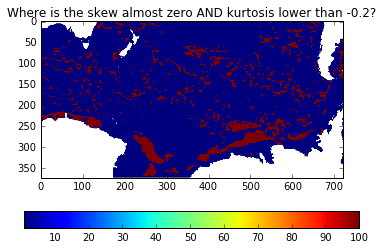

In [335]:
data=np.ones(land.shape)

data[lowKurtosisANDskew_index] = 100
plt.imshow(np.fliplr(np.rot90(data*land,2)))
plt.colorbar(orientation='horizontal')
plt.title('Where is the skew almost zero AND kurtosis lower than -0.2?')

What about the other runs?

/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  


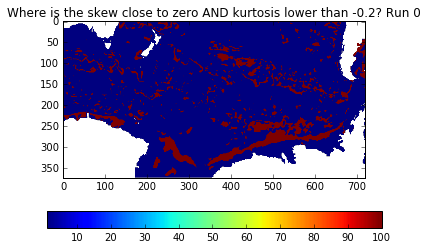

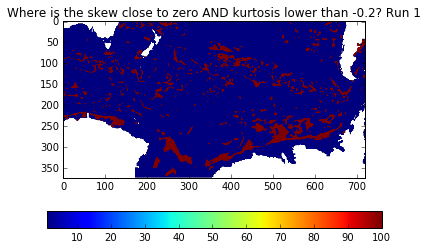

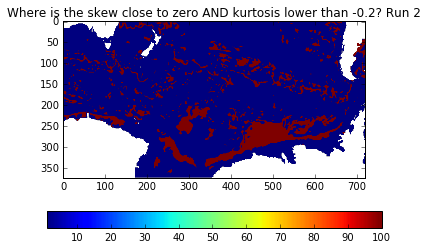

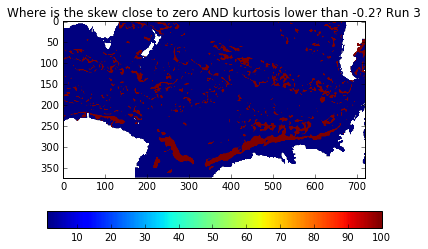

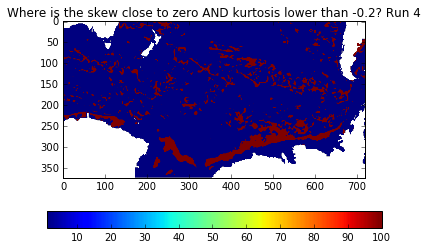

In [339]:
lowS_K = np.zeros([5,373,721])
for runs in np.arange(5):
    skewSSH_run = stats.skew(np.reshape(SSH[:,runs,...], [36*12,373,721])*land, axis=0)
    kurtosisSSH_run = stats.kurtosis(np.reshape(SSH[:,runs,...], [36*12, 373,721])*land, axis=0)
    condition=-0.2
    lowKurtosisANDskew_index = np.logical_and(kurtosisSSH_run<=condition, skewSSH<=-0.05, skewSSH>=0.05)
    data=np.ones(land.shape)
    data[lowKurtosisANDskew_index] = 100
    lowS_K[runs]=data
    plt.figure()
    plt.imshow(np.fliplr(np.rot90(data*land,2)))
    plt.colorbar(orientation='horizontal')
    plt.title('Where is the skew close to zero AND kurtosis lower than -0.2? Run '+str(runs))



So the location of the jets are similar, but different between the runs... *This is very interesting!*

Let's have a look at the average across the entire ensemble.

/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


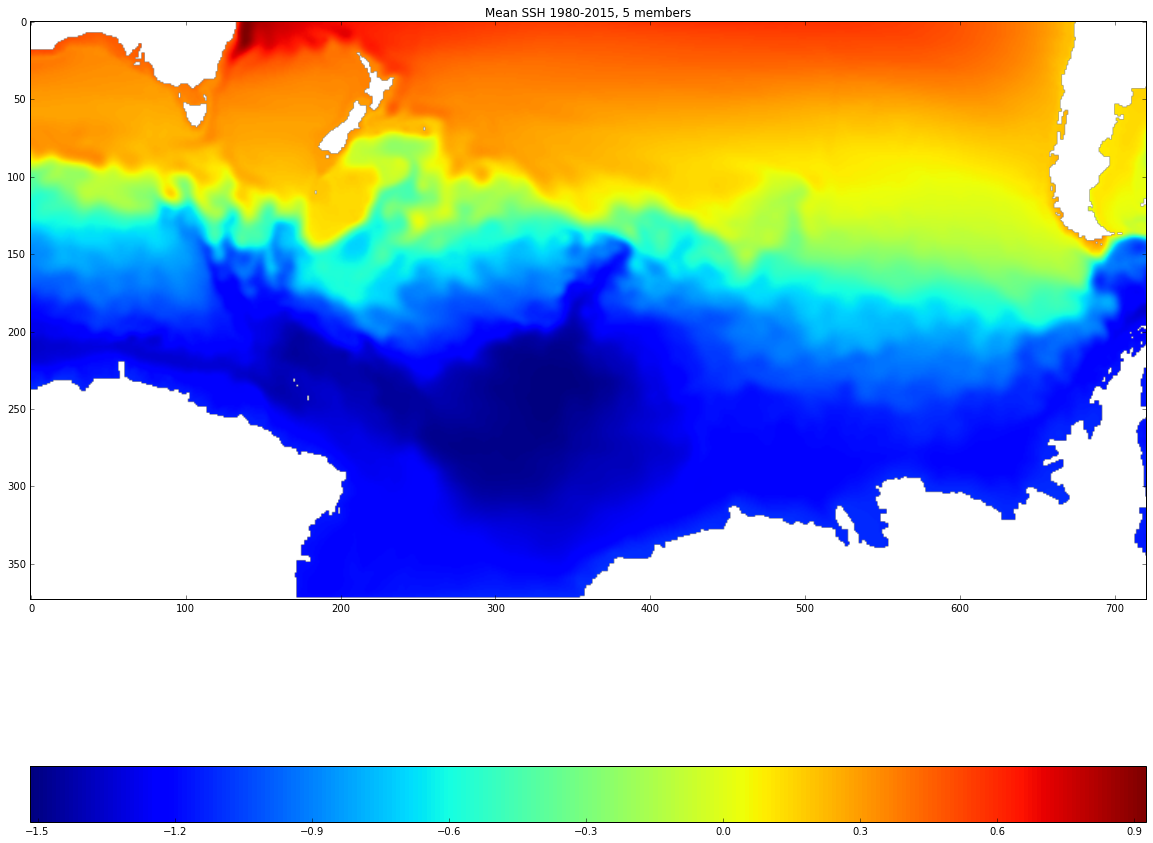

In [341]:
plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(np.nanmean(np.nanmean(np.nanmean(SSH*land, axis=0), axis=0), axis=0),2)))
plt.colorbar(orientation='horizontal')
plt.title('Mean SSH 1980-2015, 5 members')

/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: All-NaN axis encountered
  


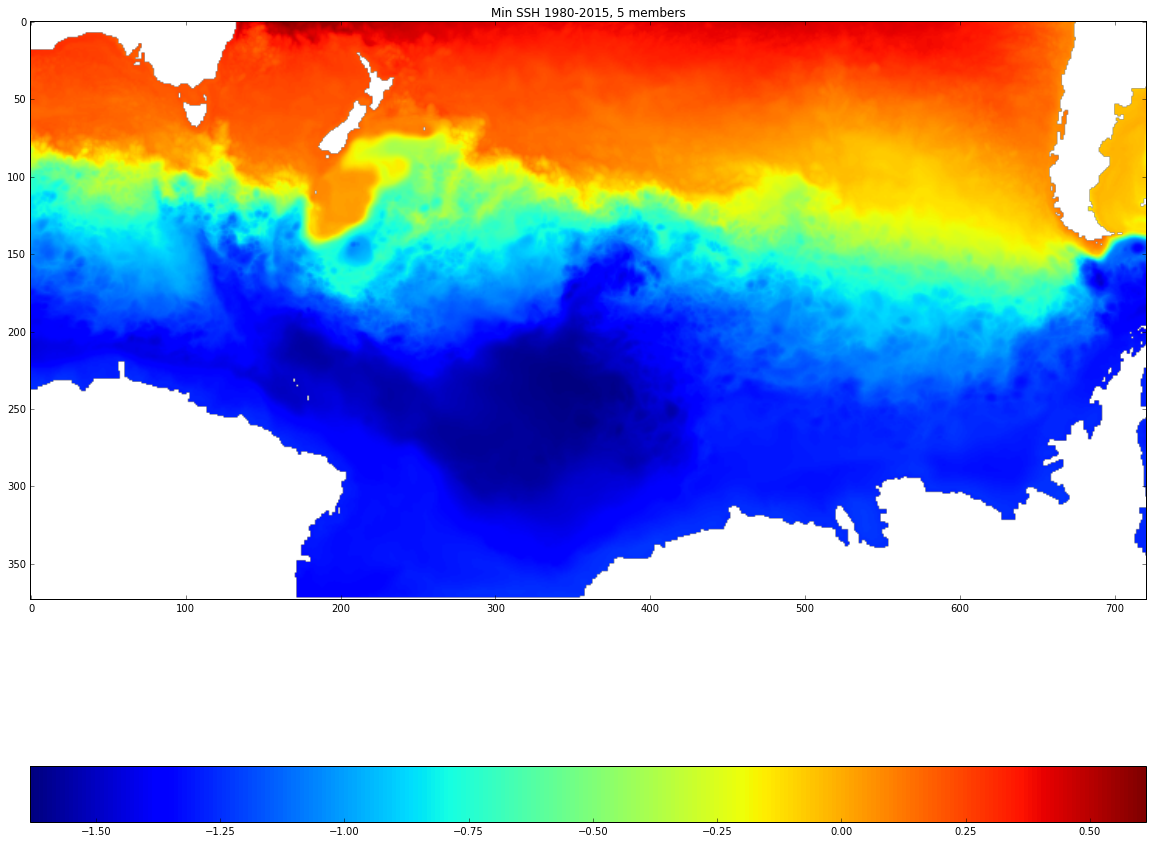

In [344]:
plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(np.nanmin(np.nanmin(np.nanmin(SSH*land, axis=0), axis=0), axis=0),2)))
plt.colorbar(orientation='horizontal')
plt.title('Min SSH 1980-2015, 5 members')

/home/maike/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: All-NaN slice encountered
  


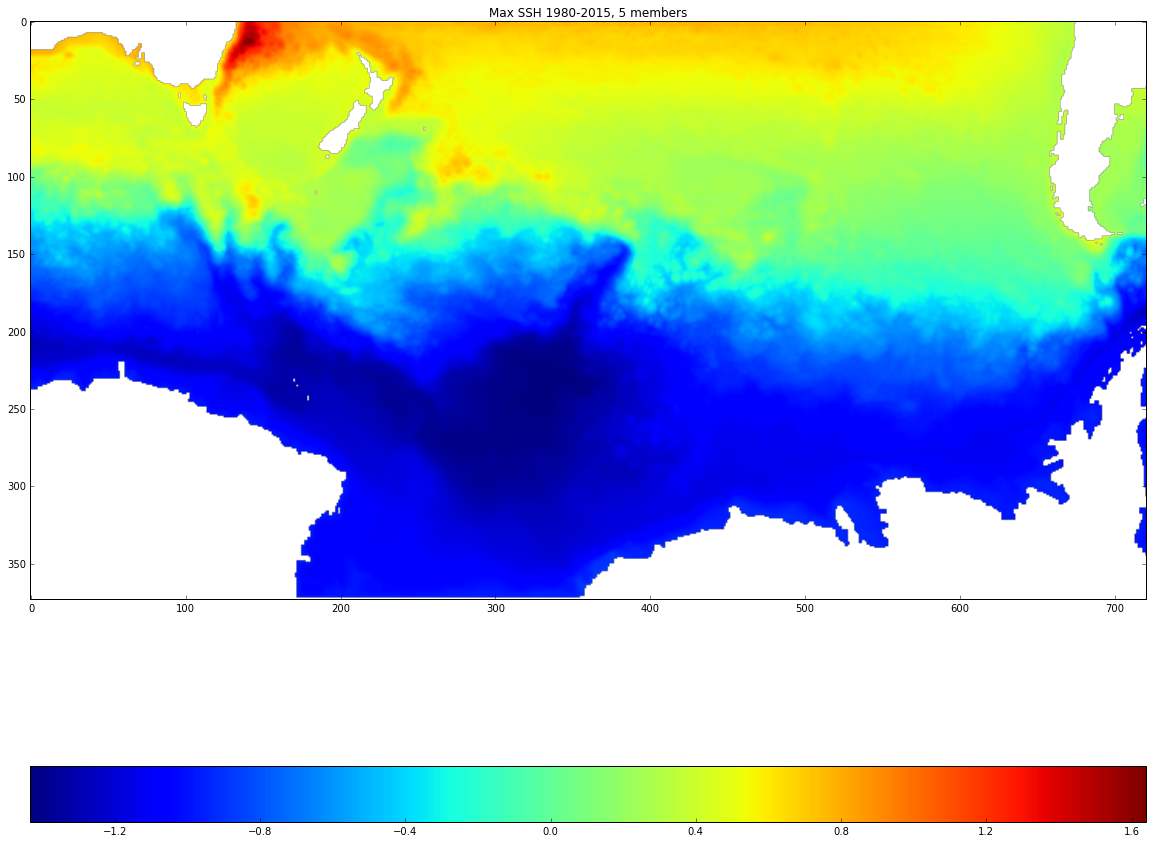

In [345]:
plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(np.nanmax(np.nanmax(np.nanmax(SSH*land, axis=0), axis=0), axis=0),2)))
plt.colorbar(orientation='horizontal')
plt.title('Max SSH 1980-2015, 5 members')

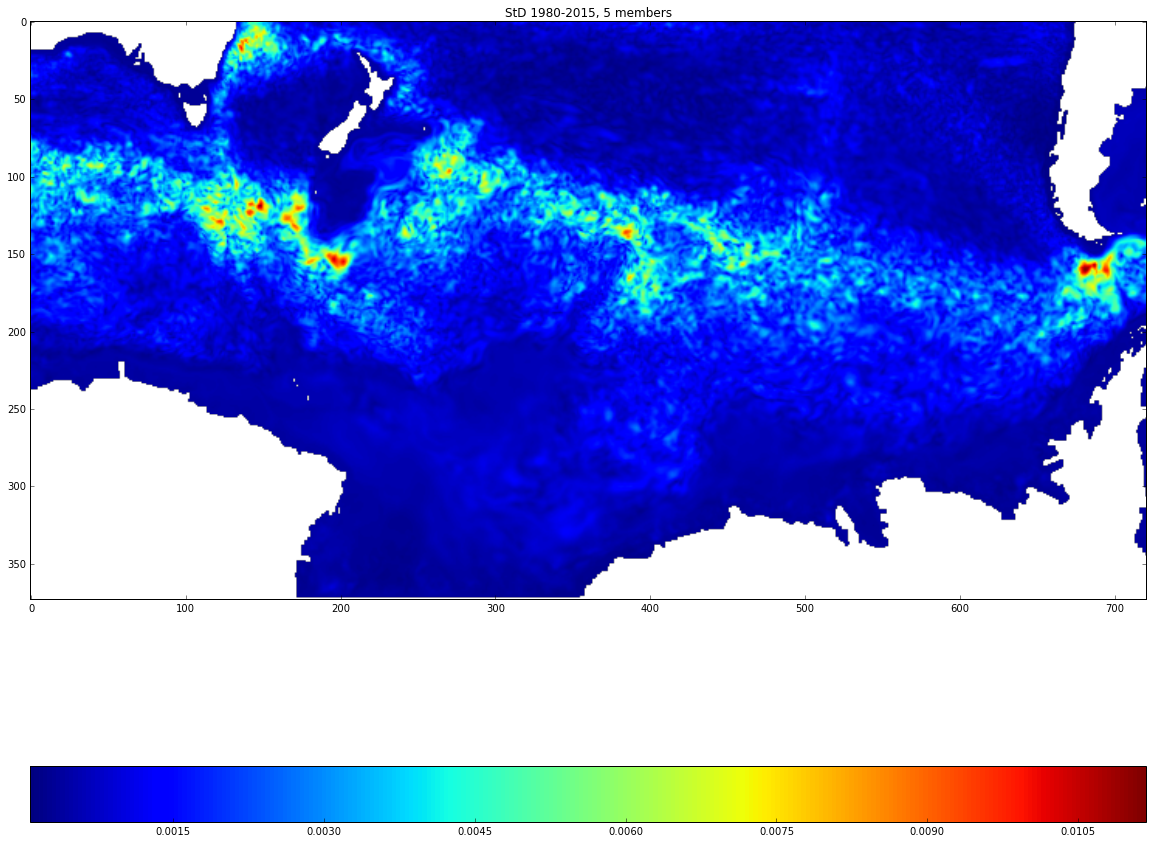

In [346]:
plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(np.std(np.std(np.std(SSH*land, axis=0), axis=0), axis=0),2)))
plt.colorbar(orientation='horizontal')
plt.title('StD 1980-2015, 5 members')

In [347]:
skewSSH = stats.skew(SSH_runsStacked, axis=0)
kurtosisSSH = stats.kurtosis(SSH_runsStacked, axis=0)

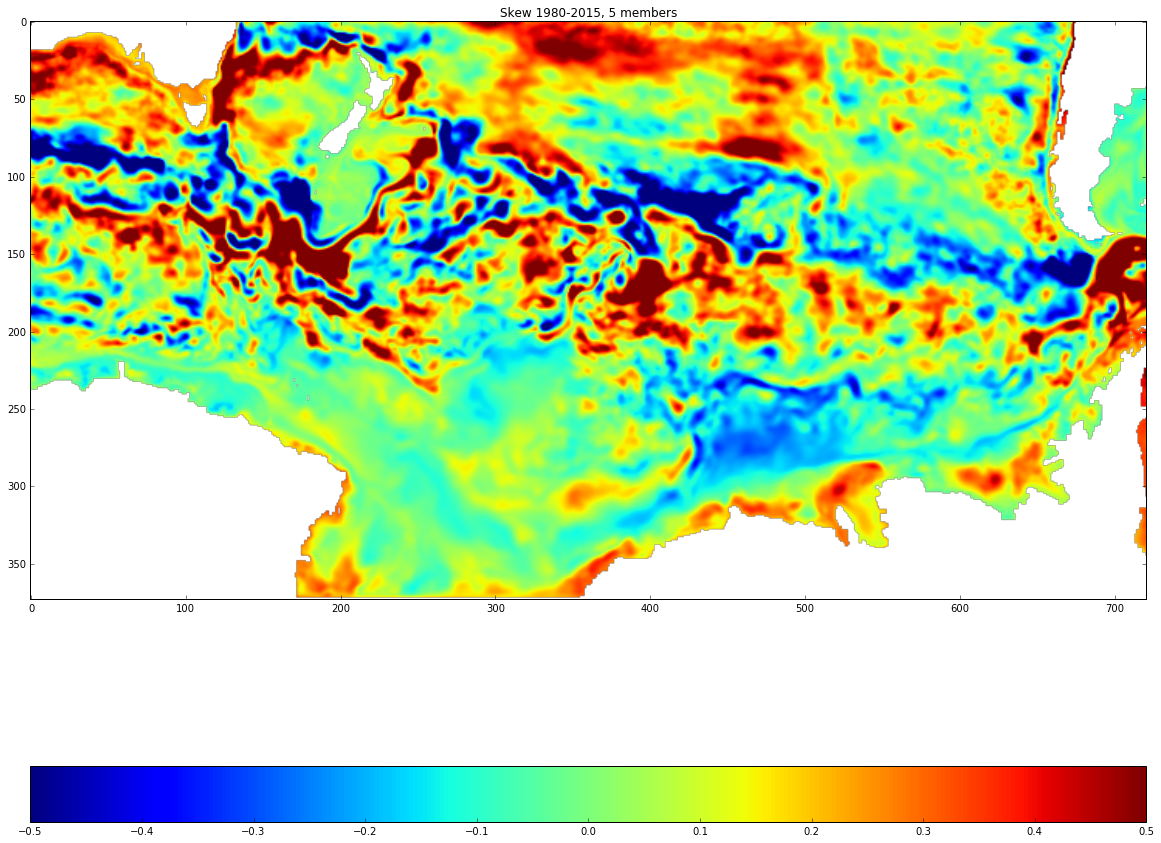

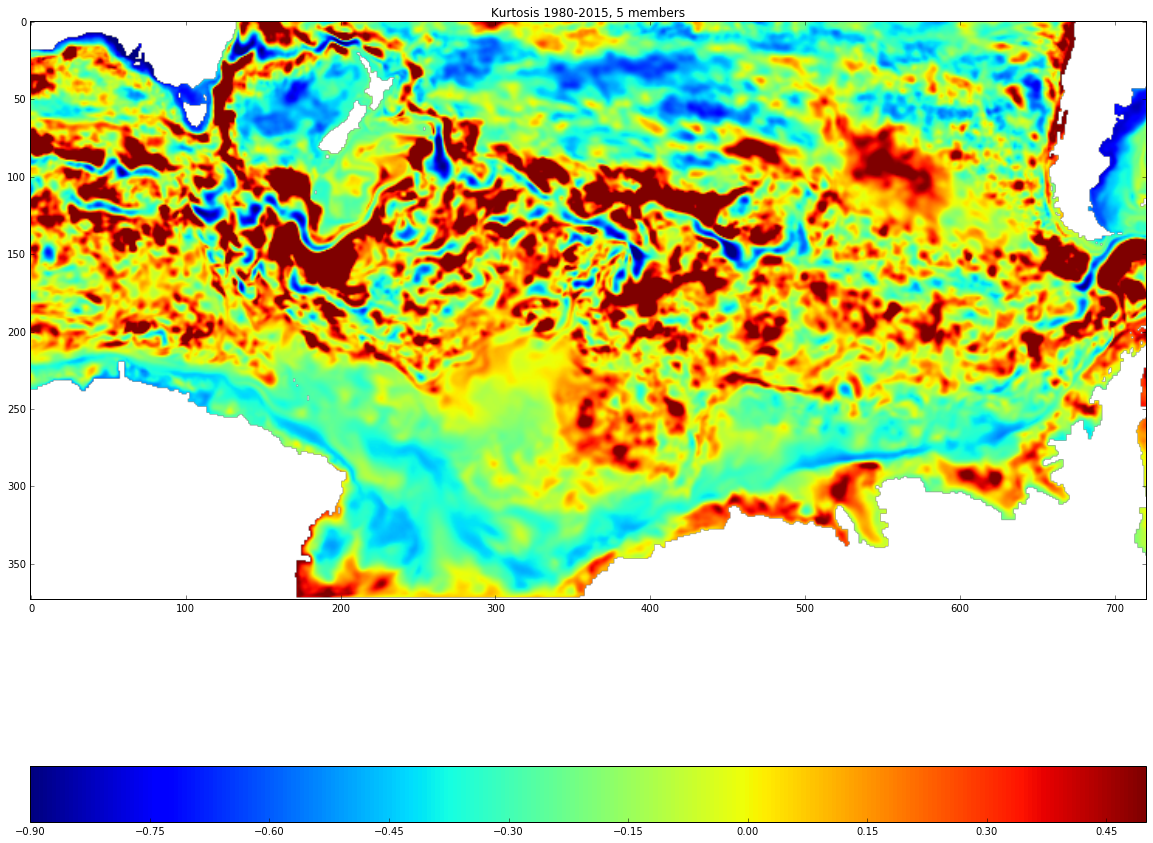

In [356]:
plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(skewSSH*land,2)))
plt.colorbar(orientation='horizontal')
plt.clim(-0.5, 0.5)
plt.title('Skew 1980-2015, 5 members')

plt.figure(figsize=(20,20))
plt.imshow(np.fliplr(np.rot90(kurtosisSSH*land,2)))
plt.colorbar(orientation='horizontal')
plt.clim(-0.9, 0.5)
plt.title('Kurtosis 1980-2015, 5 members')

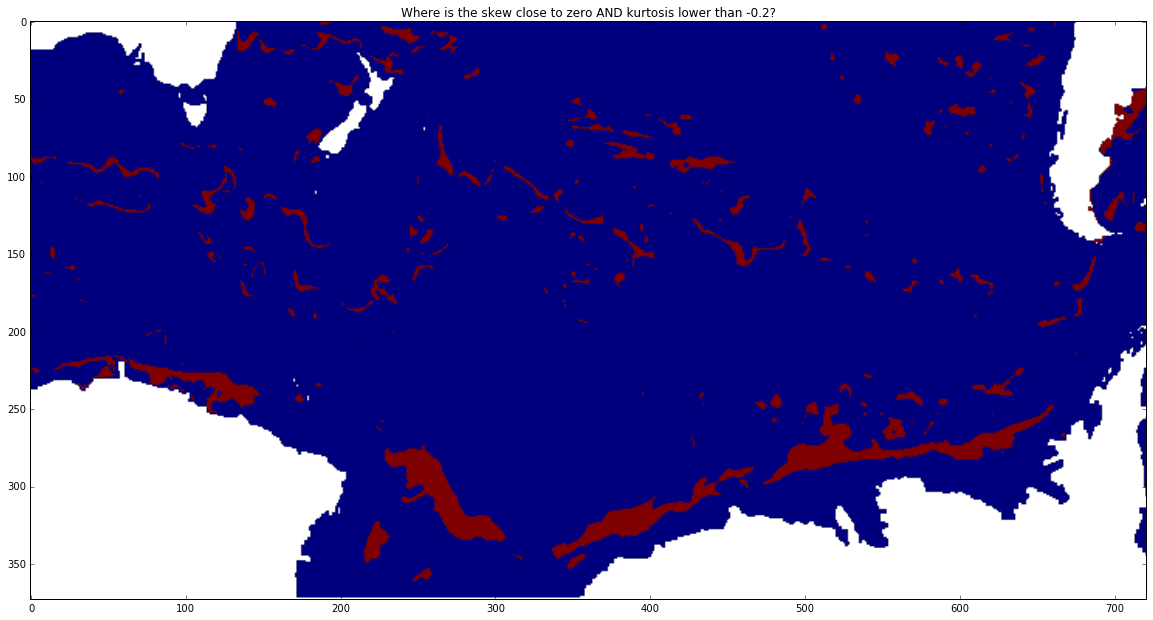

In [357]:
plt.figure(figsize=(20,20))
lowKurtosisANDskew_index = np.logical_and(kurtosisSSH<=-0.3, skewSSH<=-0.05, skewSSH>=0.05)
data=np.ones(land.shape)
data[lowKurtosisANDskew_index] = 100
lowS_K[runs]=data

plt.imshow(np.fliplr(np.rot90(data*land,2)))
#plt.colorbar(orientation='horizontal')
plt.title('Where is the skew close to zero AND kurtosis lower than -0.2?')


